In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

print("âœ… Libraries imported successfully")
print("ðŸ“‚ Current working directory:", os.getcwd())

âœ… Libraries imported successfully
ðŸ“‚ Current working directory: /Users/sachith/Desktop/Stremlit Application/Notebook


Load CSV

In [4]:
print("Current working directory:", os.getcwd())

print("Files in current directory:", os.listdir())
if os.path.exists('Data'):
    print("Files in 'Data' folder:", os.listdir('Data'))
else:
    print("'Data' folder not found.")

df = pd.read_csv('../Data/WineQT.csv')
print(f"âœ… Data loaded: {df.shape[0]} rows, {df.shape[1]} columns")

Current working directory: /Users/sachith/Desktop/Stremlit Application/Notebook
Files in current directory: ['scaler.pkl', 'Streamlit.ipynb', 'model.pkl']
'Data' folder not found.
âœ… Data loaded: 1143 rows, 13 columns


Explore and describe dataset

In [5]:
# 3rd cell: Explore and describe dataset
print("\nDataFrame Information:")
df.info()
print("\nDataFrame Description:")
print(df.describe())


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB

DataFrame Description:
       fixed acidity  volat

In [6]:
print(df['quality'].value_counts())

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64


Summarize the column "Quality" of the dataset

In [7]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


Most of the wines are rated as 5, least rated value is 3

Checking Missing Values

/var/folders/p4/l8m2c72s0t51z3y8qst3dnnr0000gn/T/ipykernel_16469/1513316116.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='viridis')


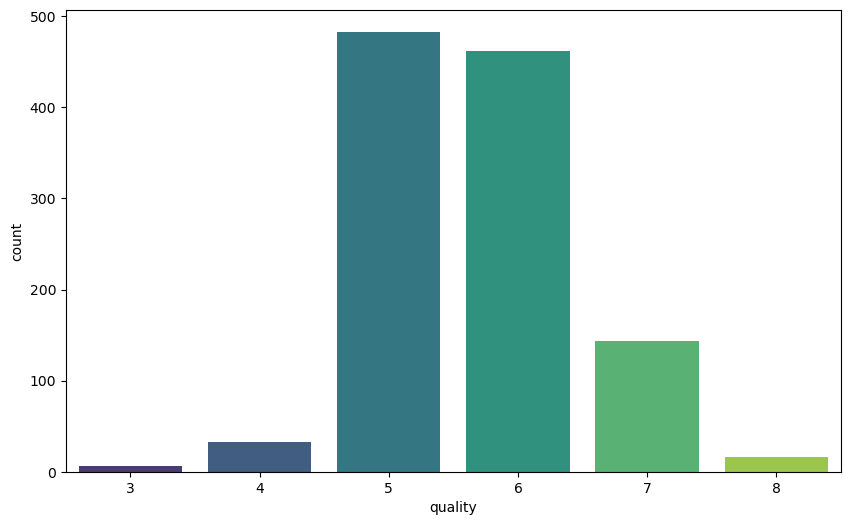

In [8]:
%matplotlib inline
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=df, palette='viridis')
plt.show()

Visualizations of the dataset, Countplot

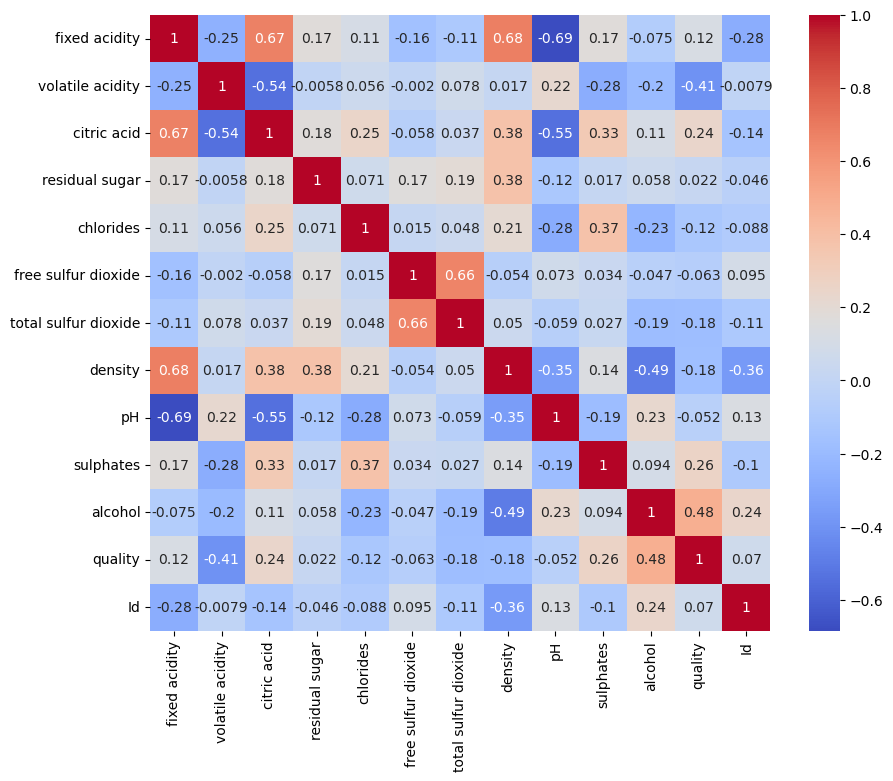

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

Heatmap

In [10]:
df['quality_label'] = df['quality'].apply(lambda q: 1 if q >= 7 else 0)

Preprocessing Dataset

In [11]:
X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Applying Feature Engineering to the Dataset

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [14]:
save_dir = os.getcwd()
model_path = os.path.join(save_dir, "model.pkl")
scaler_path = os.path.join(save_dir, "scaler.pkl")

with open(model_path, "wb") as f:
    pickle.dump(rf, f)
with open(scaler_path, "wb") as f:
    pickle.dump(scaler, f)

print(f"âœ… Model saved to {model_path}")
print(f"âœ… Scaler saved to {scaler_path}")

âœ… Model saved to /Users/sachith/Desktop/Stremlit Application/Notebook/model.pkl
âœ… Scaler saved to /Users/sachith/Desktop/Stremlit Application/Notebook/scaler.pkl


Select & Save the best model

In [15]:

pickle.dump(rf, open("model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))

In [16]:
y_pred = rf.predict(X_test_scaled)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       201
           1       0.78      0.64      0.71        28

    accuracy                           0.93       229
   macro avg       0.87      0.81      0.83       229
weighted avg       0.93      0.93      0.93       229


Confusion Matrix:
 [[196   5]
 [ 10  18]]
